In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

In [ ]:
# preparing the data
data = pd.read_excel('./ridge_regression/merged_variables_loc_gy.xlsx')
#data = df.drop(['year','Year', 'location', 'Location'], axis =1)
#data = data.dropna(axis='columns')
X = data.drop('Grain_yield', axis = 1)
y = data['Grain_yield']


,year,1_Tavg,2_Tavg,3_Tavg,4_Tavg,5_Tavg,6_Tavg,7_Tavg,8_Tavg,9_Tavg,...,2_vs,3_vs,4_vs,5_vs,6_vs,7_vs,8_vs,9_vs,10_vs,location_encoded
0,2005,7.725714,14.655000,11.125714,14.511429,14.647143,12.345000,18.738571,14.102143,14.849286,...,3.871429,2.928571,2.871429,3.628571,3.685714,3.785714,3.628571,3.200000,3.571429,51.172273
1,2006,8.555714,12.201429,9.725000,12.675714,21.397857,12.253571,16.030714,16.796429,15.217857,...,3.171429,3.871429,3.071429,2.971429,3.414286,3.414286,2.128571,3.914286,2.457143,51.172273
2,2007,10.052857,11.355000,12.655714,15.988571,13.201429,16.880000,18.617143,13.896429,16.595714,...,3.628571,3.157143,2.914286,3.657143,2.657143,3.642857,3.771429,3.300000,3.771429,51.172273
3,2008,7.832857,10.346429,10.823571,18.888571,15.147143,16.639286,11.432143,14.603571,18.146429,...,3.171429,4.128571,3.228571,3.757143,3.014286,4.600000,3.514286,3.457143,2.828571,51.172273
4,2009,9.940000,8.687857,9.933571,11.845714,15.554286,19.252143,18.395000,18.391429,17.690714,...,3.828571,4.285714,4.285714,3.214286,3.271429,3.842857,1.800000,3.200000,3.657143,51.172273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,2015,12.429286,12.880714,16.168571,15.667143,15.581429,20.252143,22.045714,21.717143,23.842857,...,3.842857,3.528571,3.357143,3.585714,2.614286,2.771429,3.028571,3.471429,3.228571,60.035897
225,2016,15.025714,15.858571,14.140000,17.297143,17.117143,16.618571,15.917143,17.710714,24.344286,...,2.700000,3.757143,3.142857,4.200000,3.571429,4.185714,3.842857,2.857143,4.142857,60.035897
226,2018,8.852857,11.872143,10.811429,12.901429,15.153571,17.810714,18.776429,20.246429,17.825714,...,5.785714,5.428571,3.157143,3.571429,3.642857,2.814286,2.642857,3.014286,3.185714,60.035897
227,2019,14.865714,11.025000,16.780000,18.289286,15.217857,18.355714,20.884286,19.895000,20.923571,...,4.714286,2.785714,2.928571,3.900000,3.200000,3.300000,3.557143,4.800000,3.500000,60.035897


In [71]:
data = pd.read_excel('./ridge_regression/merged_variables_loc_tw.xlsx')
data = data.rename(columns={'location_encoded': 'location'})

# Split the data into train and test sets
train_data = data[data['year'] < 2018]
test_data = data[data['year'].isin([2018, 2019, 2020])]

X_train = train_data.drop(columns=['Test_weight', 'year'])
y_train = train_data['Test_weight']
X_test = test_data.drop(columns=['Test_weight', 'year'])
y_test = test_data['Test_weight']
train_data

,year,1_Tavg,2_Tavg,3_Tavg,4_Tavg,5_Tavg,6_Tavg,7_Tavg,8_Tavg,9_Tavg,...,3_vs,4_vs,5_vs,6_vs,7_vs,8_vs,9_vs,10_vs,location,Test_weight
0,2005,7.725714,14.655000,11.125714,14.511429,14.647143,12.345000,18.738571,14.102143,14.849286,...,2.928571,2.871429,3.628571,3.685714,3.785714,3.628571,3.200000,3.571429,58.684165,58.105556
1,2006,8.555714,12.201429,9.725000,12.675714,21.397857,12.253571,16.030714,16.796429,15.217857,...,3.871429,3.071429,2.971429,3.414286,3.414286,2.128571,3.914286,2.457143,58.684165,59.385714
2,2007,10.052857,11.355000,12.655714,15.988571,13.201429,16.880000,18.617143,13.896429,16.595714,...,3.157143,2.914286,3.657143,2.657143,3.642857,3.771429,3.300000,3.771429,58.684165,57.862500
3,2008,7.832857,10.346429,10.823571,18.888571,15.147143,16.639286,11.432143,14.603571,18.146429,...,4.128571,3.228571,3.757143,3.014286,4.600000,3.514286,3.457143,2.828571,58.684165,59.885185
4,2009,9.940000,8.687857,9.933571,11.845714,15.554286,19.252143,18.395000,18.391429,17.690714,...,4.285714,4.285714,3.214286,3.271429,3.842857,1.800000,3.200000,3.657143,58.684165,59.851852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,2012,16.909286,10.565000,13.311429,18.031429,14.210000,17.209286,13.067143,17.562857,17.940714,...,2.957143,3.128571,5.071429,4.171429,4.942857,4.628571,5.114286,3.228571,59.756924,59.420000
219,2013,12.351429,19.168571,19.511429,14.145714,13.152143,19.310000,18.310000,19.061429,18.211429,...,3.400000,3.928571,3.685714,2.900000,4.471429,4.285714,2.714286,3.142857,59.756924,61.609091
220,2014,11.787857,14.445714,14.731429,16.989286,18.726429,17.785000,20.376429,19.583571,17.080000,...,4.757143,3.014286,3.042857,4.285714,3.128571,4.214286,4.828571,2.828571,59.756924,59.986111
221,2015,12.429286,12.880714,16.168571,15.667143,15.581429,20.252143,22.045714,21.717143,23.842857,...,3.528571,3.357143,3.585714,2.614286,2.771429,3.028571,3.471429,3.228571,59.756924,58.520833


In [72]:


# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30)

# Define the parameter grid
"""
param_grid_simplified = {
    'n_estimators': list(range(10, 151, 10)),
    'max_depth': list(range(5, 25)),
    'min_samples_split': list(range(2, 10)),
    "criterion" : ['poisson']
}
"""
# Define a smaller parameter grid for hyperparameter tuning
param_grid_simplified = {
    'max_depth': [8],
    'min_samples_split': [39],
    'n_estimators': [30],
    "criterion": ['poisson']
}
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=30)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid_simplified, 
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
try:
    grid_search.fit(X_train, y_train)
except KeyboardInterrupt:
    print("Grid search interrupted.")
    # You can retrieve partial results here if needed


# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Predict on the training and test sets using the best model
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

# Calculate RMSE and R2 for both training and testing sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# Define a function to calculate adjusted R^2
def adjusted_r2(r2, n, p):
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Number of samples and features
n_train, p = X_train.shape
n_test = X_test.shape[0]

corr_train, _ = pearsonr(y_train, y_train_pred)
corr_test, _ = pearsonr(y_test, y_test_pred)



# Display the best parameters and results
results = {
    "Best Parameters": grid_search.best_params_,
    "Train RMSE": rmse_train,
    "Train R^2": r2_train,
    "Train Corr": corr_train,
    "Test RMSE": rmse_test,
    "Test R^2": r2_test,
    "Test Corr": corr_test,
    
}

# Format results into a text structure
results_text = "\n".join([f"{key}: {value}" for key, value in results.items()])

# Save results to a text file
with open("model_performance_result_tw.txt", "w") as file:
    file.write(results_text)

print("Results saved to 'model_performance_results.txt'")

Results saved to 'model_performance_results.txt'


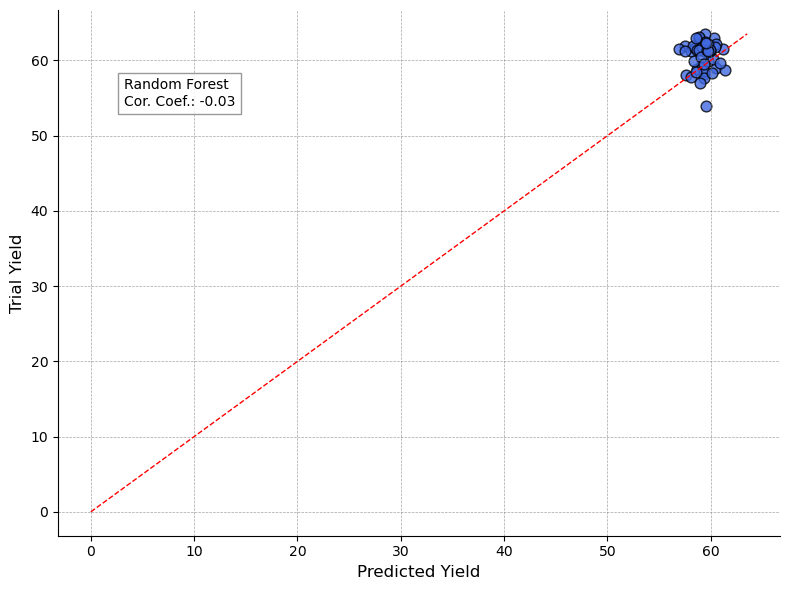

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr



# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(y_test_pred, y_test)[0, 1]

# Create scatter plot
plt.figure(figsize=(8, 6))  # Set figure size
plt.scatter(y_test_pred, y_test, alpha=0.8, edgecolor='k', color='royalblue', s=60)  # Adjust marker style

# Add diagonal reference line
max_val = max(max(y_test_pred), max(y_test))
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', linewidth=1)

# Title and labels
plt.xlabel('Predicted Yield', fontsize=12)
plt.ylabel('Trial Yield', fontsize=12)

# Remove frame (keep only bottom and left axes)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add grid lines
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Customize ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add text box
text_box = f"Random Forest\nCor. Coef.: {correlation_coefficient:.2f}"
plt.text(0.05 * max_val, 0.85 * max_val, text_box, fontsize=10,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Add legend
#plt.legend(["Reference Line"], fontsize=10, loc='upper left', frameon=False)

# Show plot
plt.tight_layout()
plt.show()


In [74]:
import shap
import matplotlib.pyplot as plt

# Ensure `best_rf_model` is defined, or replace with your actual model variable
explainer = shap.TreeExplainer(best_rf_model)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Plot and save the bar summary
plt.figure()
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=10, show=False)
plt.savefig('./merged_bar_tw.jpg')
plt.close()

# Plot and save the detailed summary plot
plt.figure()
shap.summary_plot(shap_values, X_test, max_display=10, show=False)
plt.savefig('./merged_sum_tw.jpg')
plt.close()

In [75]:
# Example: Convert numpy arrays to DataFrame
y_test_pred_df = pd.DataFrame(y_test_pred, columns=['Prediction'])  # Replace 'Prediction' with appropriate column name
#y_test = pd.DataFrame(y_test, columns=['Actual'])               # Replace 'Actual' with appropriate column name

y_test_pred_df.to_excel('./plots_models/y_test_pred_rf_tw.xlsx', index = False)
y_test.to_excel('./plots_models/y_test_rf_tw.xlsx', index = False)